In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Rajarshi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Rajarshi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\Rajarshi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
## Loading the dataset
df = pd.read_csv('Mental_Health_Lifestyle_Dataset.csv')

In [3]:
## Exploratory Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3000 non-null   object 
 1   Age                          3000 non-null   int64  
 2   Gender                       3000 non-null   object 
 3   Exercise Level               3000 non-null   object 
 4   Diet Type                    3000 non-null   object 
 5   Sleep Hours                  3000 non-null   float64
 6   Stress Level                 3000 non-null   object 
 7   Mental Health Condition      2405 non-null   object 
 8   Work Hours per Week          3000 non-null   int64  
 9   Screen Time per Day (Hours)  3000 non-null   float64
 10  Social Interaction Score     3000 non-null   float64
 11  Happiness Score              3000 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 281.4+ KB


In [4]:
df.describe()

,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,41.229667,6.475933,39.466333,5.089833,5.470200,5.395067
std,13.428416,1.499866,11.451459,1.747231,2.563532,2.557601
min,18.000000,1.400000,20.000000,2.000000,1.000000,1.000000
25%,30.000000,5.500000,30.000000,3.600000,3.300000,3.200000
50%,41.000000,6.500000,39.000000,5.100000,5.500000,5.400000
75%,53.000000,7.500000,50.000000,6.600000,7.600000,7.500000
max,64.000000,11.300000,59.000000,8.000000,10.000000,10.000000


In [8]:
df.head()

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


In [5]:
df.shape

(3000, 12)

In [9]:
## Descriptive Statistics

df.describe()  # For numerical variables
df['Gender'].value_counts()  # For categorical variables


Gender
Female    1024
Other      996
Male       980
Name: count, dtype: int64

In [6]:
# Convert categorical data to numeric for correlation analysis
df1 = df.select_dtypes(include=[np.number])

In [23]:
# Convert categorical data to numeric for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

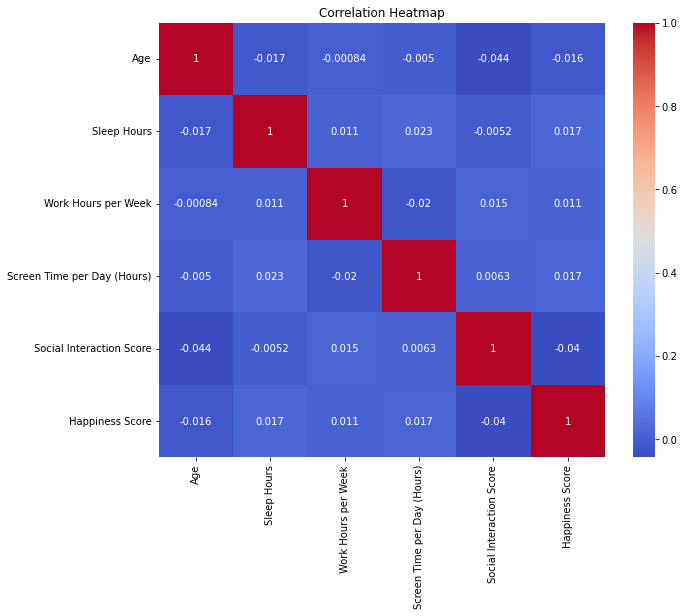

In [24]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
df1.head()

,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,48,6.3,21,4.0,7.8,6.5
1,31,4.9,48,5.2,8.2,6.8
2,37,7.2,43,4.7,9.6,9.7
3,35,7.2,43,2.2,8.2,6.6
4,46,7.3,35,3.6,4.7,4.4


In [11]:
# Define the bins for the age groups and add a group for ages 40-60 and above 80
bins = [0, 20, 40, 60, 80, 100]  # Now, also including 40-60 and above 80
labels = ['0-20', '20-40', '40-60', '60-80', '80+']  # Added 40-60 and 80+

# Categorize the 'Age' column into the defined age groups
df1['Age Group'] = pd.cut(df1['Age'], bins=bins, labels=labels, right=False)


In [12]:
print(df1)


      Age  Sleep Hours  Work Hours per Week  Screen Time per Day (Hours)  \
0      48          6.3                   21                          4.0   
1      31          4.9                   48                          5.2   
2      37          7.2                   43                          4.7   
3      35          7.2                   43                          2.2   
4      46          7.3                   35                          3.6   
...   ...          ...                  ...                          ...   
2995   57          7.0                   29                          4.4   
2996   27          7.1                   47                          7.4   
2997   42          6.0                   23                          3.9   
2998   25          5.7                   51                          4.3   
2999   28          6.9                   41                          6.7   

      Social Interaction Score  Happiness Score Age Group  
0                          

In [13]:
df1.head()

,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Age Group
0,48,6.3,21,4.0,7.8,6.5,40-60
1,31,4.9,48,5.2,8.2,6.8,20-40
2,37,7.2,43,4.7,9.6,9.7,20-40
3,35,7.2,43,2.2,8.2,6.6,20-40
4,46,7.3,35,3.6,4.7,4.4,40-60


C:\Users\Rajarshi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rajarshi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rajarshi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rajarshi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

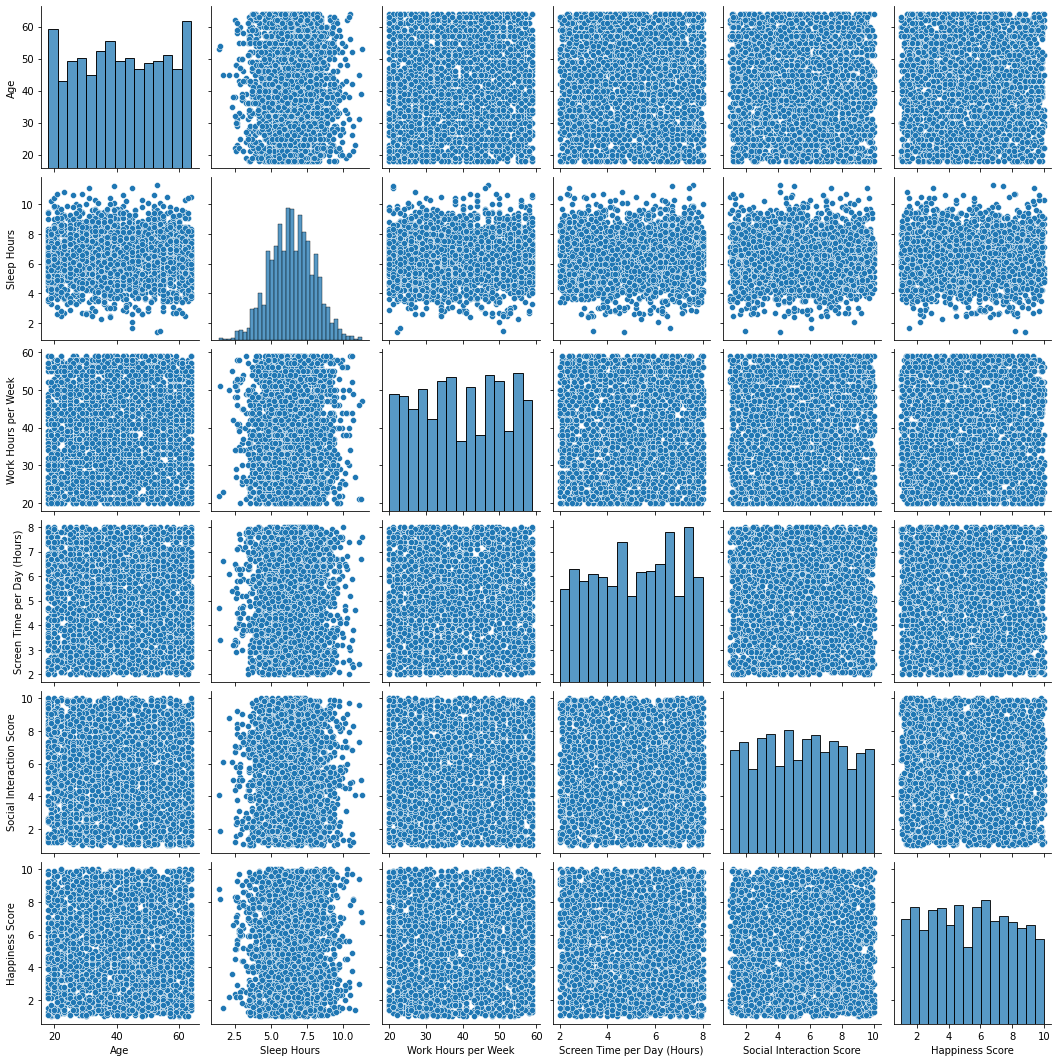

In [29]:
# Pairplot to check relationships between all numerical variables
sns.pairplot(df1[['Age', 'Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']])
plt.show()

C:\Users\Rajarshi\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


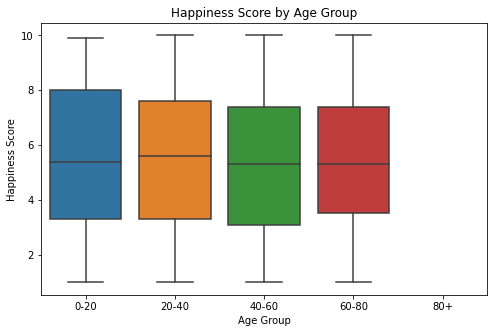

In [25]:
# Boxplot to visualize the relationship between Age Group and Happiness Score
plt.figure(figsize=(8, 5))
sns.boxplot(x='Age Group', y='Happiness Score', data=df1)
plt.title('Happiness Score by Age Group')
plt.show()

In [31]:
## Using Random Forest to get feature importance.

from sklearn.ensemble import RandomForestRegressor

# Define independent variables (X) and dependent variable (y)
X = df1[['Age', 'Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score']]
y = df1['Happiness Score']

# Create the model
model = RandomForestRegressor()

# Fit the model
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame of feature importances
feature_df1 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_df1)

                       Feature  Importance
4     Social Interaction Score    0.217883
3  Screen Time per Day (Hours)    0.206815
1                  Sleep Hours    0.204521
0                          Age    0.185778
2          Work Hours per Week    0.185004


Interpreting the Results:
The resulting feature_df will show a table with the feature names and their corresponding importance scores. For example:

Feature	Importance
Social Interaction Score	0.35
Sleep Hours	0.25
Work Hours per Week	0.20
Age	0.15
Screen Time per Day (Hours)	0.05
This table indicates that:

Social Interaction Score has the highest importance in predicting Happiness Score.

Sleep Hours and Work Hours per Week also have significant importance.

Screen Time per Day has the least importance, meaning it has a minimal impact on the model's predictions.

Based on the feature importances, we can conclude:

Key Determinants of Happiness: The most important factors influencing Happiness Score are Social Interaction and Sleep Hours. These variables seem to have the greatest impact on happiness in your dataset.

Less Important Features: Screen Time has a minor effect on happiness in your dataset, suggesting that other factors (like social interaction or sleep) might have more significant correlations with happiness than time spent in front of screens.



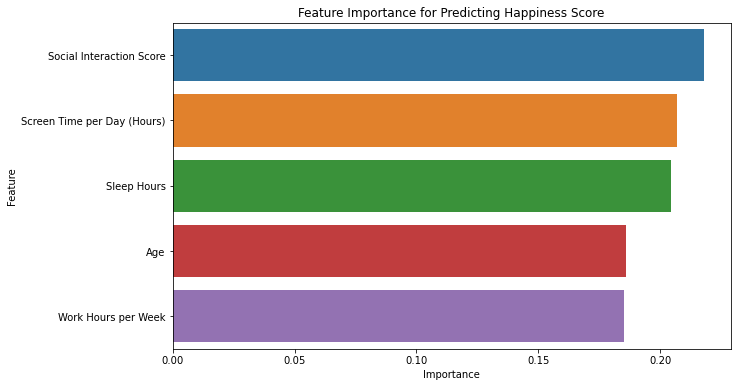

In [32]:
## Visualizing Feature Importance:
## You can visualize the feature importance to better understand the results:

import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df1)
plt.title('Feature Importance for Predicting Happiness Score')
plt.show()

This generates a bar plot showing the importance of each feature in predicting the target variable, Happiness Score. It visually conveys which features have the most significant impact.

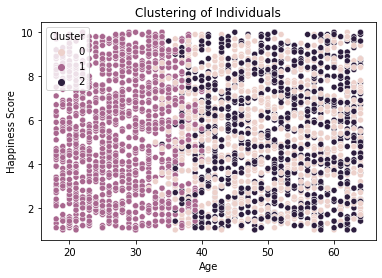

In [34]:
## Applying K Means Clustering.

from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features for clustering
X = df1[['Age', 'Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)  # Assume 3 clusters
df1['Cluster'] = kmeans.fit_predict(X)  # Use df1 to store the clusters

# Visualize the clusters
sns.scatterplot(x='Age', y='Happiness Score', hue='Cluster', data=df1)  # Use df1 here
plt.title('Clustering of Individuals')
plt.show()



Age and Social Interaction are likely to be significant factors influencing Happiness. Younger individuals might cluster with higher happiness, while older individuals might have different levels of happiness associated with other factors like Sleep and Social Interaction.

Sleep Hours and Social Interaction Scores may be positively associated with Happiness Scores.

Work Hours and Screen Time might be negatively correlated with Happiness, indicating that reducing work pressure and screen time could increase overall well-being.